# Project 2: Find Ppc, Tpc, and Z-factor for gases

#### Assigned: February 24, 2021

#### Due: March 16, 2021

**Use the D2L discussion board to ask questions or respond to the questions of your classmates. All TAs and Instructors are available to assist you when you face a problem in completing your project.**



## Gas Properties:

Use the functions you have developed in Project#1 for evaluating gas properties. 

In [2]:
# All libraries you need for this project. Run this cell once.
import math
import pandas as pd
import matplotlib.pyplot as plt

### Part 1: Gas Compressibility Factor
Use the functions you have developed in Project#1 for evaluating gas properties.
##### Note 1: these correlations are valued for 0.57<gamma_G<1.68, with CO2<12%mole, N2<3%mole, and no H2S.
##### Note 2: temp is in Fahrenheit and pres is in psia. 
##### Note 3: Ppc is in Psia, and Tpc is in Rankine. 
##### Note 4: The reduced pressure and tempertaure have been evaulaed in ZFACT function. 

In [3]:
# Note 1: these correlations are valued for 0.57<gamma_G<1.68, with CO2<12%mole, N2<3%mole, and no H2S.
# Note 2: temp is in Fahrenheit and pres is in psia. 
# Note 3: Ppc is in Psia, and Tpc is in Rankine. 
# Note 4: The reduced pressure and tempertaure have been evaulaed in ZFACT function. 
def TPC1(gamma_G):
    value_TPC1 = 169.2 + 349.5 * gamma_G - 74 * (gamma_G * gamma_G)
    return value_TPC1

def PPC1(gamma_G):
    value_PPC1 = 756.8 - 131 * gamma_G - 3.6 * (gamma_G * gamma_G)
    return value_PPC1

def ZFACT(temp, pres, gamma_G):
    Tpr = (temp+459.69)/TPC1(gamma_G)
    Ppr = pres/PPC1(gamma_G)
    A = 1.39 * (Tpr - 0.92) ** 0.5 - 0.36 * Tpr - 0.101
    B = Ppr * (0.62 - 0.23 * Tpr) + (0.066 / (Tpr - 0.86) - 0.037) * (Ppr ** 2) + 0.32 * Ppr ** 6 / (10 ** (9 * (Tpr - 1)))
    C = 0.132 - (0.32 * (math.log10(Tpr)))
    D = 10 ** (0.3106 - 0.49 * Tpr + 0.1824 * (Tpr ** 2))
    value_ZFACT = A + (1 - A) * math.exp(-B) + C * Ppr ** D
    return value_ZFACT

### Part 2: Define New Functions for Gas Viscosity and Gas Formation Volume Factor

Define a fucntion called GFVF(temp, pres, gamma_G). When Pres is in psia and Temp in Fahrenheit, gas formation volume factor (in bbl/SCF) is:

$Bg = 0.005035 Z (T+459.69)/P$

Define a function called GVISC(temp, pres, gamma_G) using correlation of Lee et. al (derived purely for sweet gas, see the uploaded paper): 

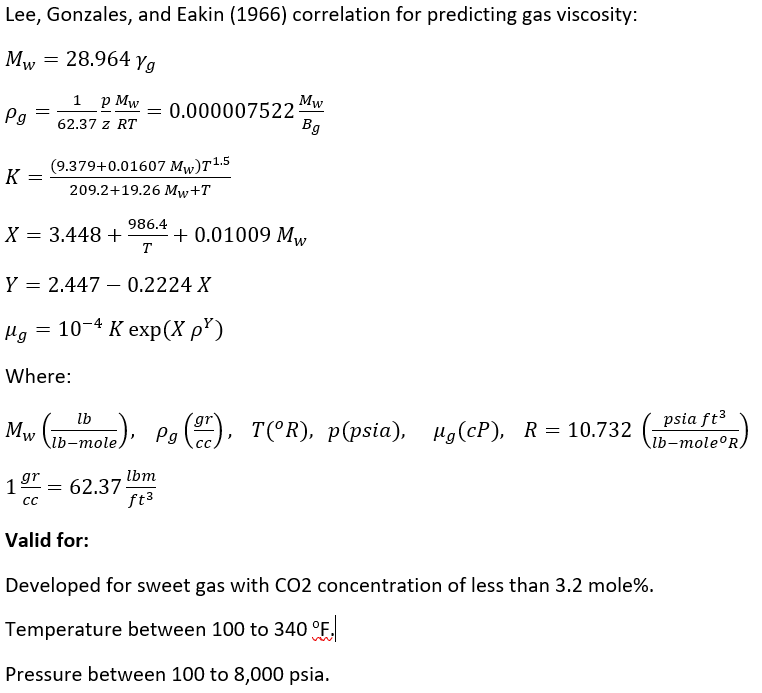

##### Note 1: In above correlation, when P is in psia and T in Rankine, the function returns the gas viscosity in cP. 
##### Note 2: Remember, when calling the function GVISC, we want to pass "pres" is in psia and "temp" in Fahrenheit.  Therefore, you need to convert temp to Rankine inside the GVISC function. You can call GFVF inside the GVISC function. See the above example when we call PPC1 and TPC1 functions in ZFACT function. 

In [4]:
##T in Fahrenheit, P in psia, gas FVF in bbl/cu.ft, gas viscosity in cP

# Z = ZFACT(temp, pres, gamma_G)
# R = 8.314

def GFVF(temp, pres, Z):
    return 0.005035 * Z * (temp + 459.69)/pres

def GVISC(temp, pres, gamma_G, Z):

    Mw = 28.964*gamma_G
    Bg = 0.005035 * Z * (temp + 459.69)/pres
    rho_g = 0.000007522*(Mw / Bg)
    K = ((9.379+0.01607)*(temp**1.5)) / (209.6+19.26*Mw + temp)
    X = 3.448 + (986.4 / temp) + 0.01009*Mw
    Y = 2.447 - 0.2224*X
    mu_g = K * math.exp(X*rho_g**Y)*10**(-4)

    return mu_g


##### Test functions
Plot z-factor, gas FVF, and gas viscosity for the specific gas gravity of 0.65 at T=170 degree Farenheight when Pressure changes from 1000 to 5000 psia.

    pressure  z factor
0       1000  0.921409
1       1200  0.907535
2       1400  0.895060
3       1600  0.884226
4       1800  0.875220
5       2000  0.868171
6       2200  0.863157
7       2400  0.860207
8       2600  0.859303
9       2800  0.860396
10      3000  0.863402
11      3200  0.868214
12      3400  0.874709
13      3600  0.882752
14      3800  0.892200
15      4000  0.902911
16      4200  0.914743
17      4400  0.927562
18      4600  0.941239
19      4800  0.955655
20      5000  0.970703


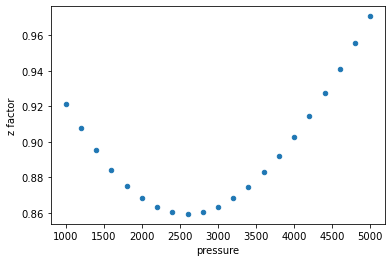

    pressure       FVF
0       1000  0.002921
1       1200  0.002398
2       1400  0.002027
3       1600  0.001752
4       1800  0.001542
5       2000  0.001376
6       2200  0.001244
7       2400  0.001136
8       2600  0.001048
9       2800  0.000974
10      3000  0.000912
11      3200  0.000860
12      3400  0.000816
13      3600  0.000777
14      3800  0.000744
15      4000  0.000716
16      4200  0.000691
17      4400  0.000668
18      4600  0.000649
19      4800  0.000631
20      5000  0.000616


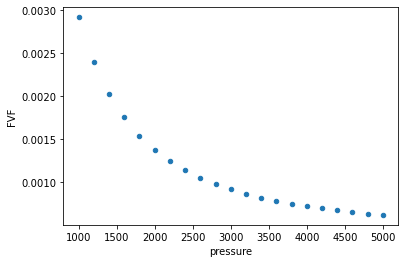

    pressure  Viscosity
0       1000   0.075914
1       1200   0.095954
2       1400   0.118651
3       1600   0.144121
4       1800   0.172402
5       2000   0.203447
6       2200   0.237121
7       2400   0.273202
8       2600   0.311394
9       2800   0.351345
10      3000   0.392670
11      3200   0.434973
12      3400   0.477867
13      3600   0.521001
14      3800   0.564065
15      4000   0.606801
16      4200   0.649007
17      4400   0.690535
18      4600   0.731284
19      4800   0.771195
20      5000   0.810242


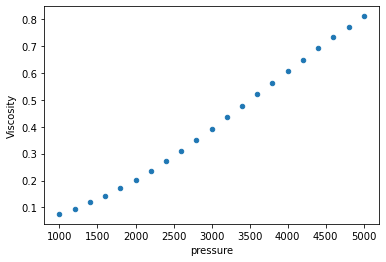

In [5]:
##this is what I have written for testing the above functions. You may choose to write in a different format

gamma_G=0.65
y1_zfactor=list()
y2_fvf=list()
y3_visc=list()
x_pressure=list()
temp=170

for p in range(1000,5200,200):
    pres = p
    z_factor_value=ZFACT(temp,pres,gamma_G)
    GFVF_value=GFVF(temp,pres,z_factor_value)
    GVISC_value=GVISC(temp,pres,gamma_G, z_factor_value)
    y1_zfactor.append(z_factor_value)
    y2_fvf.append(GFVF_value)
    y3_visc.append(GVISC_value)
    x_pressure.append(p)

data_zfactor = {
      "pressure": x_pressure,
      "z factor":y1_zfactor
    }

df_zfact = pd.DataFrame(data_zfactor)

print(df_zfact)
df_zfact.plot(kind='scatter',x='pressure',y='z factor')
plt.show()

data_gfvf = {
      "pressure": x_pressure,
      "FVF":y2_fvf
    }

df_gfvf = pd.DataFrame(data_gfvf)

print(df_gfvf)
df_gfvf.plot(kind='scatter',x='pressure',y='FVF')
plt.show()

data_gvisc = {
      "pressure": x_pressure,
      "Viscosity":y3_visc
    }

df_gvisc = pd.DataFrame(data_gvisc)

print(df_gvisc)
df_gvisc.plot(kind='scatter',x='pressure',y='Viscosity')
plt.show()


## Pressure Traverse in a Gas Well:

### Part 3: Define a Function to Calculate the Pressure drop for Gas Flow in a Vertical Pipe 

PRESSURE2(dL, ID, epsilon, q_gas, pres1, Tave, Pave, gamma_G) where dL is the length of the well section that we evaluate the pressure drop, D is the tubing ID, pres1 is the pressure at point 1, epsilon is the surface roughness, q_gas is the gas flow rate, Pave is the average pressure and Tave is the avergae temperature in that section. 

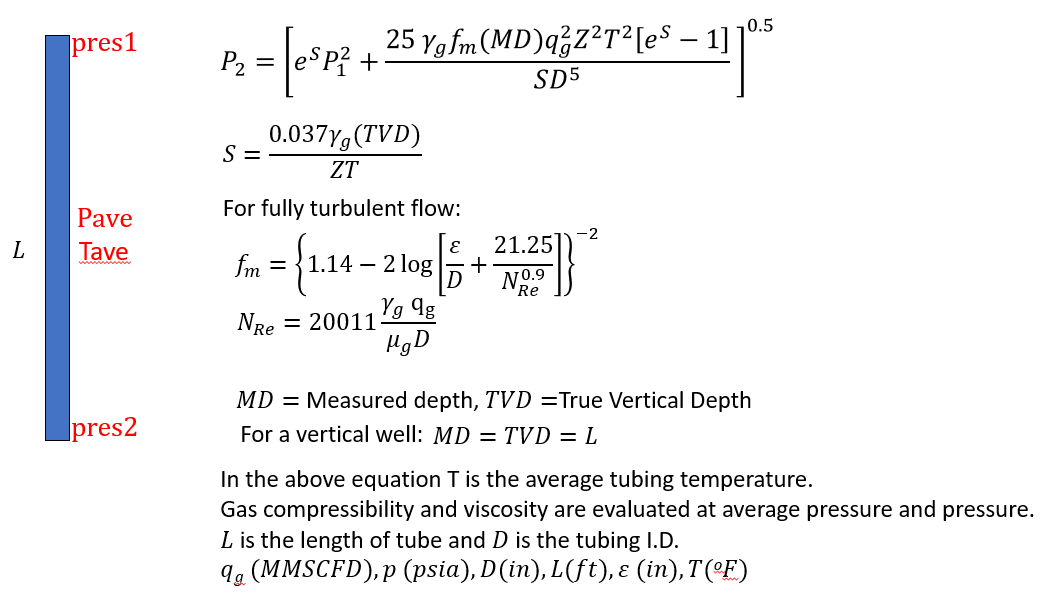

In [6]:
## this is only a suggested format for this function.

def PRESSURE2(gamma_G, epsilon, ID, dL, Zave, Tave, pres1, q_gas): 
    #Zave = ZFACT(Tave, Pave, gamma_G)
    Nre = 20011*(gamma_G*q_gas) / (GVISC(temp, pres, gamma_G, Zave)*ID)
    fm = (2 * math.log(3.71 / (epsilon / ID) + (21.25 / (Nre**0.9))))**(-2)
    S = (0.037*gamma_G*dL) / (Zave*Tave)

    part1 = (math.e**S)*(pres1**2)
    numerator = gamma_G * fm * dL * (q_gas**2) * (Zave**2) * (Tave**2) * (math.e**S - 1)
    denominator = 4*(10**10)*S*(ID**5)
    P2 = (part1 + numerator / denominator)**0.5

    return P2



### Part 4: Plot the Pressure Traverse for a Vertical Gas Well

Using the given parameters for production from a dry gas reservoir, find the pressure as a function of depth in the tubing (from wellhead to wellbore). Divide the well into 500 ft sections.  

##### Note: The solution for pressure at any section will be iterative since z-factor and gas viscosity depend on the average pressure and tempertaure in that section. 

Suggested procedure for iteration at each section is:

**Step 1:** Assume a value for the pressure at point 2 (pres2). You may choose pres2=pres1

**Step 2:** calculate the average pressure: Pave = (pres1+pres2)/2

**Step 3:** calculate the average temperature in that section with the assumption of linear temperature profile

**Step 4:** calculate the pressure at point 2 by calling the PRESSURE2 function. Remember that in PRESSURE2 function, z-factor and gas viscosity should be evaluated at the average pressure and temperature

**Step 5:** Update the average pressure (Step 2)

##### Iterate the above stpes untill the change in pressure at point 2 or the average pressure is less than 0.00001.

Tave332.33500000000004
Zave0.9947687053730179
ITERATION # : 1
     Pave4000.0
     Zave_new = 0.9947687053730179
     P2_new = 4079.115488642101
     P2 = 4079.115488642101
 
ITERATION # : 2
     Pave4039.5577443210504
     Zave_new = 0.996226806661346
     P2_new = 4119.455640530975
     P2 = 4119.455640530975
 
ITERATION # : 3
     Pave4059.7278202654875
     Zave_new = 0.9969818934438646
     P2_new = 4139.905980503626
     P2 = 4139.905980503626
 
ITERATION # : 4
     Pave4069.952990251813
     Zave_new = 0.997367671421159
     P2_new = 4150.27161943808
     P2 = 4150.27161943808
 
ITERATION # : 5
     Pave4075.13580971904
     Zave_new = 0.9975639770405755
     P2_new = 4155.525308120341
     P2 = 4155.525308120341
 
ITERATION # : 6
     Pave4077.7626540601705
     Zave_new = 0.9976636688236136
     P2_new = 4158.187987033875
     P2 = 4158.187987033875
 
ITERATION # : 7
     Pave4079.0939935169376
     Zave_new = 0.9977142452420141
     P2_new = 4159.537466476471
     P2 = 4159.5

ITERATION # : 5
     Pave5136.182071423409
     Zave_new = 1.048041475220039
     P2_new = 5232.590237514522
     P2 = 5232.590237514522
 
ITERATION # : 6
     Pave5139.274270877964
     Zave_new = 1.0482166034186902
     P2_new = 5235.7082510855225
     P2 = 5235.7082510855225
 
ITERATION # : 7
     Pave5140.833277663464
     Zave_new = 1.0483049556615467
     P2_new = 5237.280244669019
     P2 = 5237.280244669019
 
ITERATION # : 8
     Pave5141.619274455213
     Zave_new = 1.0483495142970882
     P2_new = 5238.072781837168
     P2 = 5238.072781837168
 
ITERATION # : 9
     Pave5142.015543039287
     Zave_new = 1.0483719826935114
     P2_new = 5238.472346013689
     P2 = 5238.472346013689
 
ITERATION # : 10
     Pave5142.215325127548
     Zave_new = 1.0483833112593635
     P2_new = 5238.6737891428775
     P2 = 5238.6737891428775
 
ITERATION # : 11
     Pave5142.316046692142
     Zave_new = 1.048389022874964
     P2_new = 5238.775348016372
     P2 = 5238.775348016372
 
ITERATION # : 12

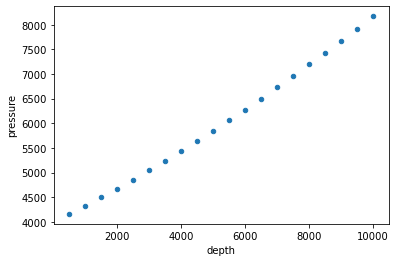

In [7]:
## Information about the gass well:

L = 10000 #ft, well length
ID = 1.995 #in, well tubing I.D.
Twh = 100 #degree F, wellhead tempertaure
Twf = 200 #degree F, bottomhole temperature
gamma_G = 0.7 # gas gravity
Pwh = 4000 #psia, wellhead pressure
epsilon = 0.0018 #in, tube roughness
q_gas = 15 #MMSCFD, gas flow rate
n = 20 # number of well segments
dL = L/n #ft, length of each segment

x_depth = list()
y_pres = list()

depth_value = 0
temp1 = Twh
pres1 = Pwh
grad_temp = (Twf-Twh)/L #degree in F, linear temperature gradient 

# initial iteration value calculations
T1 = temp1
T2 = grad_temp*dL + T1
P1 = pres1
P2 = pres1

Pave = (P1 + P2) / 2
Tave = ((T2 + T1) + 459.67) / 2
Zave = ZFACT(Tave, Pave, gamma_G)

print("Tave" + str(Tave))
print("Zave" + str(Zave))

P2_new = 0
P2_old = 1


for i in range(1, n+1, 1):

    counter = 1

    while(abs(P2_new - P2_old) > 0.00001) :

        P2_old = P2

        Pave = (P1 + P2) / 2

        P2_new = PRESSURE2(gamma_G, epsilon, ID, dL, Zave, Tave, Pave, q_gas)
        
        Zave = ZFACT(Tave, Pave, gamma_G)

        P2 = P2_new

        print("ITERATION # : " + str(counter))
        print("     Pave" + str(Pave))
        print("     Zave_new = " + str(Zave))
        print("     P2_new = " + str(P2_new))
        print("     P2 = " + str(P2))
        print(" ")

        counter = counter + 1

    print("-------------- NEW SECTION --------------- ")
    print(" ")

    P1 = P2_new
    P2_old = P2 + 1
    
    depth_value = depth_value + dL
    x_depth.append(depth_value)
    y_pres.append(P1)

data = {
    "depth": x_depth,
    "pressure": y_pres
}

df = pd.DataFrame(data)

print(df)
df.plot(kind='scatter', x = 'depth', y = 'pressure')
plt.show()



### Bonus: Find the Natural Gas Flow for the Above Well 

#### 1. Construct TPR
For the above well, plot Pwf vs. q_gas when the gas flow rates changes from 1 MMSCF to 50 MMSCF.

**Note:** You can convert the above iterative procedure to a function which can return Pwf for each q_gas. When calculating Pwf, divide the well into 500 ft sections.

#### 2. Construct IPR
Use C and n method to plot Pwf vs. q_gas for gas flow rates changes from 1 MMSCF to 50 MMSCF. From a test data, C and n were calcualted as:

$n = 0.86$\
$C = 2\times 10^{-5} MMSCFD/psia^{2n}$

#### 3. Find the natural flow from the intersect of IPR and TPR curves

# How to submit your work:
  
Run your file. 

Upload the Jupyter Notbook file and also the PDF version.  

To make PDF, press ctrl+p and save as PDF.
  